In [517]:
import pandas as pd

path_to_file = "./data/Orders.csv"
data = pd.read_csv(path_to_file)
print(data.shape)
data.head()

(51290, 24)


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [518]:
import re
def clean_prof_sales(x):
    empty_list = []
    for i in x:
        m = re.search('\d+\.\d+', i)
        empty_list.append(float(m.group()))
    return empty_list
        

In [519]:
# convert sales and profit to numeric
data.Sales = clean_prof_sales(data.Sales)
data.Profit = clean_prof_sales(data.Profit)

In [520]:
# order.date to datetime
from datetime import datetime
data['Order.Date']= [datetime.strptime(i,'%m/%d/%y') for i in data['Order.Date']]


In [521]:
# create month column
list = []
for i in data['Order.Date']:
    list.append(i.month)

    

In [522]:
data['Order.Month'] = list

In [523]:
orderXmonth = data.groupby(data['Order.Month']).sum()


In [524]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


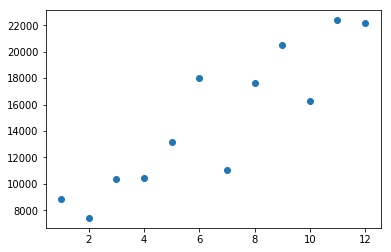

In [525]:
# plot orders per month
plt.scatter(y = orderXmonth['Quantity'], x= orderXmonth.index)

In [526]:
orderXcat = data.groupby(['Order.Month','Category']).sum()

In [527]:
orderXcat = orderXcat.reset_index(drop=False)

In [528]:
furn = orderXcat[orderXcat.Category == "Furniture"]

In [529]:
OS = orderXcat[orderXcat.Category == "Office Supplies"]
Tech = orderXcat[orderXcat.Category == "Technology"]

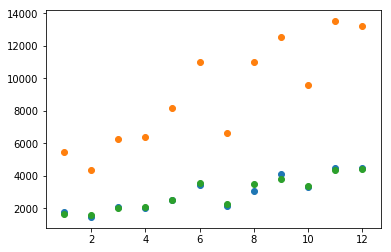

In [530]:
plt.scatter(y = furn['Quantity'], x= furn['Order.Month'])
plt.scatter(y = OS['Quantity'], x= OS['Order.Month'])
plt.scatter(y = Tech['Quantity'], x= Tech['Order.Month'])


In [531]:
# - Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

# 	1. How much profit did we lose due to returns each year?


# 	2. How many customer returned more than once? more than 5 times?


# 	3. Which regions are more likely to return orders?


# 	4. Which categories (sub-categories) of products are more likely to be returned?

# - ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [532]:
path_to_file = "./data/Returns.csv"
returns = pd.read_csv(path_to_file)

In [533]:
returns=returns.rename(columns = {'Order ID':'Order.ID'})

In [534]:
returns.head()

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [535]:
#change west and east Canada to Canada in returns

mask = returns.Region == "Eastern Canada"
column_name = 'Region'
returns.loc[mask, column_name] = "Canada"

mask = returns.Region == "Western Canada"
column_name = 'Region'
returns.loc[mask, column_name] = "Canada"

In [536]:
returns.Region.unique()

array(['Central US', 'Eastern Asia', 'Oceania', 'Western Europe',
       'Southern Europe', 'Western Asia', 'Southern US',
       'Southern Africa', 'Eastern US', 'Eastern Europe',
       'Southeastern Asia', 'Western US', 'Southern Asia',
       'Northern Europe', 'Canada', 'Central America', 'South America',
       'North Africa', 'Caribbean', 'Central Africa', 'Western Africa',
       'Eastern Africa', 'Central Asia'], dtype=object)

In [537]:
merge = pd.merge(data, returns,  how='left', on = 'Order.ID')

In [538]:
returned = merge[merge.Returned.notnull()]

In [539]:
list1 = []
for i in returned['Order.Date']:
    list1.append(i.year)

In [540]:
returned['Year'] = list1

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [541]:
retXyear = returned.groupby(['Year']).sum()

In [542]:
# profit lost per year from returns
retXyear

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month
Year,,,,,,,,
2012,11019108,5512777.0,74935.81,1457,66.968,23022.34,12636.185,3390
2013,10678896,5025481.0,67575.21,1508,66.860,22695.95,11137.672,3353
2014,15493169,7994617.0,100737.41,2096,81.714,31389.49,15856.426,4418
2015,19394127,7911427.0,129683.98,2614,110.986,46928.17,21212.313,5888


In [543]:
import collections

counter=collections.Counter(retCust)
#print(counter)

over_five = dict((k, v) for k, v in counter.items() if v > 5)
over_one = dict((k, v) for k, v in counter.items() if v > 1)

In [544]:
# customers that returned over five times
len(over_five)

124

In [545]:
# customers that returned more than once
len(over_one)

448

In [546]:
# returns per region
full_regionRet = data.groupby(['Region']).size()

In [547]:
# orders per region
ret_regionRet = returns.groupby(['Region']).size()

In [548]:
full_regionRet = pd.DataFrame(full_regionRet).reset_index()
ret_regionRet = pd.DataFrame(ret_regionRet).reset_index()

In [549]:
# rename cols before merge
ret_regionRet=ret_regionRet.rename(columns = {0:'returns'})
full_regionRet=full_regionRet.rename(columns = {0:'returnsFull'})

In [550]:
# merge
full = pd.merge(full_regionRet, ret_regionRet, how = 'left', on = 'Region')

In [551]:
# calc percent return column
full['percRet'] = full.returns / full.returnsFull *100

In [552]:
# sort perc return column
sort = full.sort_values(['percRet'], ascending=[False])
#sort
# Southern U.S., Southern EU, Eastern US, South Africa, Western US most likely to return

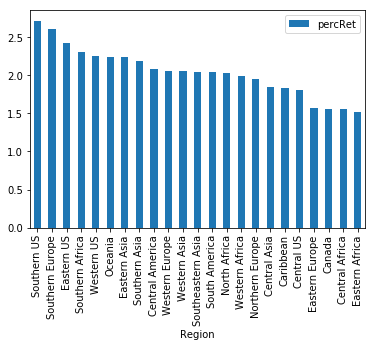

In [553]:
# plot
x = sort[['percRet', 'Region']]
y = pd.DataFrame.drop_duplicates(x)
y =y.set_index('Region')
y.sort_values('percRet', ascending=False)[['percRet']].plot.bar(stacked=True, rot=90)


In [568]:
# returns per sub category
full_catRet = data.groupby(['Sub.Category']).size()

In [570]:
# orders per sub category
ret_catRet = returned.groupby(['Sub.Category']).size()

In [572]:
full_catRet = pd.DataFrame(full_catRet).reset_index()
ret_catRet = pd.DataFrame(ret_catRet).reset_index()

In [574]:
# rename cols before merge
ret_catRet=ret_catRet.rename(columns = {0:'returns'})
full_catRet=full_catRet.rename(columns = {0:'ordersFull'})

In [576]:
# merge
full1 = pd.merge(full_catRet, ret_catRet, how = 'left', on = 'Sub.Category')

In [577]:
# calc percent return column
full1['percRet'] = full1.returns / full1.ordersFull *100

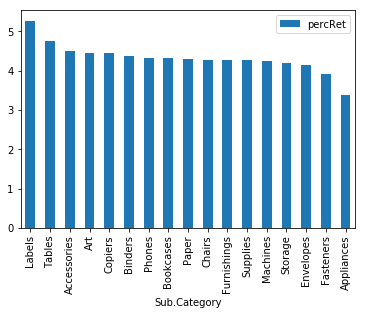

In [579]:
# plot
x1 = full1[['percRet', 'Sub.Category']]
y1 = pd.DataFrame.drop_duplicates(x1)
y1 =y1.set_index('Sub.Category')
y1.sort_values('percRet', ascending=False)[['percRet']].plot.bar(stacked=True, rot=90)

In [566]:
# Labels, Tables, Accessories returned the most. Appliances and fasteners the least